# 2차 정리
- 1. 이상치 제거시 침실수,욕실수 1개 빼고 다 날라감
- => 5퍼 미만인거 빼야하나?
- => 일단 지금은 가격 특정만 하면 되는거니 지울거 다 지우고 해봄
- => 14퍼? 정도에서 42퍼로 가격과 관계증가한거 확인

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from matplotlib import font_manager, rc
%matplotlib inline

# 글꼴 경로 지정
font_path = "c:/Windows/Fonts/malgun.ttf"  # 윈도우에 설치된 맑은 고딕 폰트 경로

# 폰트 이름 얻어오기
font_name = font_manager.FontProperties(fname=font_path).get_name()

# matplotlib의 rc(run command) 기능을 이용하여 글꼴 설정
mpl.rc('font', family=font_name)

# 유니코드에서  음수 부호 설정
mpl.rc('axes', unicode_minus=False)

raw = pd.read_csv('../../../../datasets/paris_listings.csv')
df = raw.copy()

df = df[['id', 'host_id','host_is_superhost',
        'host_total_listings_count','neighbourhood_cleansed','room_type','accommodates','bathrooms','bedrooms',
        'beds','amenities','price','minimum_nights','maximum_nights','number_of_reviews', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy', 
        'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 
        'review_scores_location', 'review_scores_value', 'reviews_per_month']]

df = df.rename(columns= {
    'id': '숙소_id',
    'host_id': '호스트_id',
    'host_is_superhost': '슈퍼호스트',
    'host_total_listings_count': '숙소_수',
    'neighbourhood_cleansed': '숙소_지역',
    'room_type': '숙소_유형',
    'accommodates': '수용_인원수',
    'bathrooms': '욕실수',
    'bedrooms': '침실수',
    'beds': '침대수',
    'amenities': '편의시설',
    'price': '숙소_가격',
    'minimum_nights': '최소_숙박일',
    'maximum_nights': '최대_숙박일',
    'number_of_reviews': '리뷰수',
    'number_of_reviews_l30d': '30일_리뷰수',
    'review_scores_rating': '리뷰점수',
    'review_scores_accuracy': '숙소_정확성_리뷰점수',
    'review_scores_cleanliness': '숙소_청결도_리뷰점수',
    'review_scores_checkin': '숙소_체크인_리뷰점수',
    'review_scores_communication': '숙소_소통_리뷰점수',
    'review_scores_location': '숙소_위치_리뷰점수',
    'review_scores_value': '숙소_가격_리뷰점수',
    'reviews_per_month': '평균_리뷰수'
})

df['url'] = raw['listing_url']

df['숙소_특징']= raw['property_type']

# 슈퍼호스트, 리뷰수 결측치 제거
print(f"처음 df : {len(df)}")
df = df[~df['슈퍼호스트'].isnull()]
print(f"슈퍼호스트 제거 : {len(df)}")
df = df[df['리뷰수']!=0]
print(f"리뷰수 제거 : {len(df)}")

#숙소가격 null값 제거
check1= df[~df['숙소_가격'].isnull()]

#가격 앞 통화기호 제거
check1['숙소_가격'] = check1['숙소_가격'].replace('[\$,]', '', regex=True).astype(float)

# 욕실수,침대수,침실수 결측치 제거
print(f"욕실,침대,침실 수 제거 전 : {len(check1)}")
check1 = check1.dropna(subset=['욕실수', '침실수', '침대수'])
print(f"제거 후 : {len(check1)}")

# 유형 제거 
check1 = check1[(check1['숙소_유형']=='Entire home/apt') | (check1['숙소_유형']=='Private room')]
print(f"숙소_유형 제거 : {len(check1)}")


처음 df : 84397
슈퍼호스트 제거 : 84306
리뷰수 제거 : 58744
욕실,침대,침실 수 제거 전 : 41751
제거 후 : 41615
숙소_유형 제거 : 41024


C:\Users\ciw96\AppData\Local\Temp\ipykernel_41532\1356650136.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  check1['숙소_가격'] = check1['숙소_가격'].replace('[\$,]', '', regex=True).astype(float)


In [40]:
check1.groupby('침실수')['숙소_가격'].mean()

침실수
0.0      129.580599
1.0      161.249338
2.0      292.025412
3.0      420.646472
4.0      563.919048
5.0      969.618321
6.0      640.948718
7.0      724.166667
8.0     1990.000000
9.0      130.000000
10.0     100.000000
12.0      90.000000
32.0      65.000000
33.0     148.000000
50.0     115.000000
Name: 숙소_가격, dtype: float64

In [41]:
print(check1['침실수'].value_counts())

침실수
1.0     25291
2.0      7398
0.0      4907
3.0      2608
4.0       630
5.0       131
6.0        39
7.0        12
33.0        2
50.0        1
32.0        1
12.0        1
9.0         1
10.0        1
8.0         1
Name: count, dtype: int64


In [42]:
check1.groupby('침실수')['숙소_가격'].mean()

침실수
0.0      129.580599
1.0      161.249338
2.0      292.025412
3.0      420.646472
4.0      563.919048
5.0      969.618321
6.0      640.948718
7.0      724.166667
8.0     1990.000000
9.0      130.000000
10.0     100.000000
12.0      90.000000
32.0      65.000000
33.0     148.000000
50.0     115.000000
Name: 숙소_가격, dtype: float64

In [43]:

print(check1['침대수'].value_counts())

침대수
1.0     19092
2.0     12194
3.0      4536
4.0      1993
0.0      1966
5.0       714
6.0       299
7.0       120
8.0        60
9.0        26
10.0       10
11.0        6
12.0        3
13.0        2
17.0        1
77.0        1
14.0        1
Name: count, dtype: int64


In [44]:
check1.groupby('침대수')['숙소_가격'].mean()

침대수
0.0      171.416073
1.0      142.056202
2.0      210.152288
3.0      326.441358
4.0      385.757652
5.0      493.745098
6.0      500.852843
7.0      523.775000
8.0      521.566667
9.0      512.423077
10.0     659.400000
11.0    1173.500000
12.0     966.666667
13.0     699.000000
14.0     109.000000
17.0    1014.000000
77.0     115.000000
Name: 숙소_가격, dtype: float64

In [45]:
print(check1['욕실수'].value_counts())

욕실수
1.0     32540
1.5      3690
2.0      2966
2.5       749
3.0       481
0.5       168
0.0       160
3.5       129
4.0        78
4.5        24
5.0        17
5.5         8
6.0         7
7.0         2
6.5         2
48.0        1
7.5         1
8.0         1
Name: count, dtype: int64


In [46]:
check1.groupby('욕실수')['숙소_가격'].mean()

욕실수
0.0      159.556250
0.5      107.172619
1.0      170.653964
1.5      248.837669
2.0      375.341537
2.5      440.917223
3.0      577.332640
3.5      782.666667
4.0      804.205128
4.5     1452.250000
5.0     1379.705882
5.5     2532.500000
6.0      851.000000
6.5     1427.000000
7.0     1386.500000
7.5      120.000000
8.0      109.000000
48.0     115.000000
Name: 숙소_가격, dtype: float64

In [47]:
print(check1['수용_인원수'].value_counts())

수용_인원수
2     18378
4     11091
3      3551
6      3288
5      1666
1      1407
8       810
7       395
10      211
12       79
9        61
11       32
14       17
15       15
16       12
13       11
Name: count, dtype: int64


In [48]:
check1.groupby('수용_인원수')['숙소_가격'].mean()

수용_인원수
1      82.340441
2     141.051311
3     185.294002
4     228.845460
5     287.543217
6     370.969891
7     429.526582
8     524.811111
9     617.737705
10    725.431280
11    583.093750
12    599.025316
13    569.818182
14    631.058824
15    465.933333
16    979.333333
Name: 숙소_가격, dtype: float64

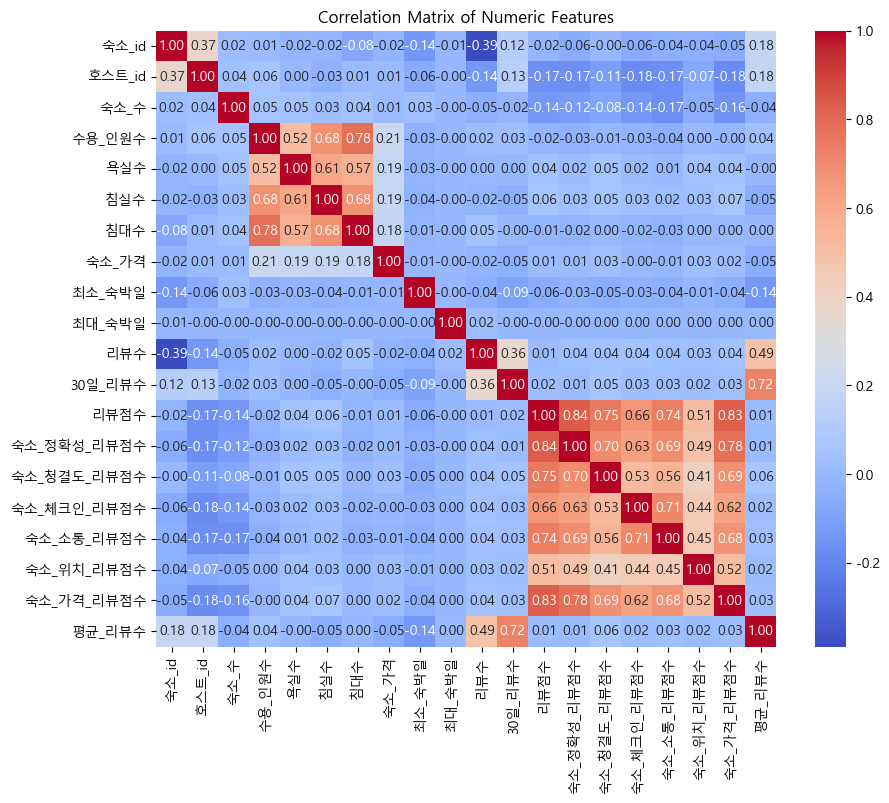

In [49]:
# 수치형 데이터만 포함하는 데이터프레임 생성
numeric_data = check1.select_dtypes(include=[np.number])

# 상관관계 계산
correlation_matrix = numeric_data.corr()

# 상관관계 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()

# 침실수, 욕실수, 침대수 일단 1000개 이하 값들 제거

In [50]:
check1 = check1[(check1['침실수'] <= 3) & (check1['침대수'] <= 4) & (check1['욕실수'] <= 2) & (check1['수용_인원수'] <= 6) ]

In [51]:
# 이상치 제거 함수
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# 각 컬럼에 대해 이상치 제거
columns_to_check = ['숙소_가격']
for column in columns_to_check:
    check1 = remove_outliers(check1, column)

# 결과 확인
print(check1.describe())

              숙소_id        호스트_id          숙소_수        수용_인원수           욕실수  \
count  3.552500e+04  3.552500e+04  35525.000000  35525.000000  35525.000000   
mean   4.908116e+17  1.699295e+08     37.401210      2.923378      1.078973   
std    4.408527e+17  1.873286e+08    142.821807      1.243103      0.248585   
min    3.109000e+03  2.626000e+03      1.000000      1.000000      0.000000   
25%    3.369751e+07  1.702720e+07      1.000000      2.000000      1.000000   
50%    6.519498e+17  6.695262e+07      2.000000      2.000000      1.000000   
75%    9.144171e+17  3.253067e+08      7.000000      4.000000      1.000000   
max    1.110937e+18  5.663053e+08   5656.000000      6.000000      2.000000   

                침실수           침대수         숙소_가격        최소_숙박일        최대_숙박일  \
count  35525.000000  35525.000000  35525.000000  35525.000000  3.552500e+04   
mean       1.069529      1.517917    145.621478     11.035355  6.089604e+04   
std        0.620926      0.827271     69.302139    

In [52]:
print(check1['침대수'].unique())
print(check1['침실수'].unique())
print(check1['욕실수'].unique())

[1. 2. 3. 0. 4.]
[1. 0. 2. 3.]
[1.  1.5 2.  0.  0.5]


In [53]:
check1.dtypes

숙소_id            int64
호스트_id           int64
슈퍼호스트           object
숙소_수           float64
숙소_지역           object
숙소_유형           object
수용_인원수           int64
욕실수            float64
침실수            float64
침대수            float64
편의시설            object
숙소_가격          float64
최소_숙박일           int64
최대_숙박일           int64
리뷰수              int64
30일_리뷰수          int64
리뷰점수           float64
숙소_정확성_리뷰점수    float64
숙소_청결도_리뷰점수    float64
숙소_체크인_리뷰점수    float64
숙소_소통_리뷰점수     float64
숙소_위치_리뷰점수     float64
숙소_가격_리뷰점수     float64
평균_리뷰수         float64
url             object
숙소_특징           object
dtype: object

# 1. 상관관계 분석
- 그렇게 큰 수치는 아니지만 확실히 침대수, 침실수, 욕실수, 수용인원수 관련 있음
- 물론 다른거에 비해서임

In [54]:
check1.dtypes

숙소_id            int64
호스트_id           int64
슈퍼호스트           object
숙소_수           float64
숙소_지역           object
숙소_유형           object
수용_인원수           int64
욕실수            float64
침실수            float64
침대수            float64
편의시설            object
숙소_가격          float64
최소_숙박일           int64
최대_숙박일           int64
리뷰수              int64
30일_리뷰수          int64
리뷰점수           float64
숙소_정확성_리뷰점수    float64
숙소_청결도_리뷰점수    float64
숙소_체크인_리뷰점수    float64
숙소_소통_리뷰점수     float64
숙소_위치_리뷰점수     float64
숙소_가격_리뷰점수     float64
평균_리뷰수         float64
url             object
숙소_특징           object
dtype: object

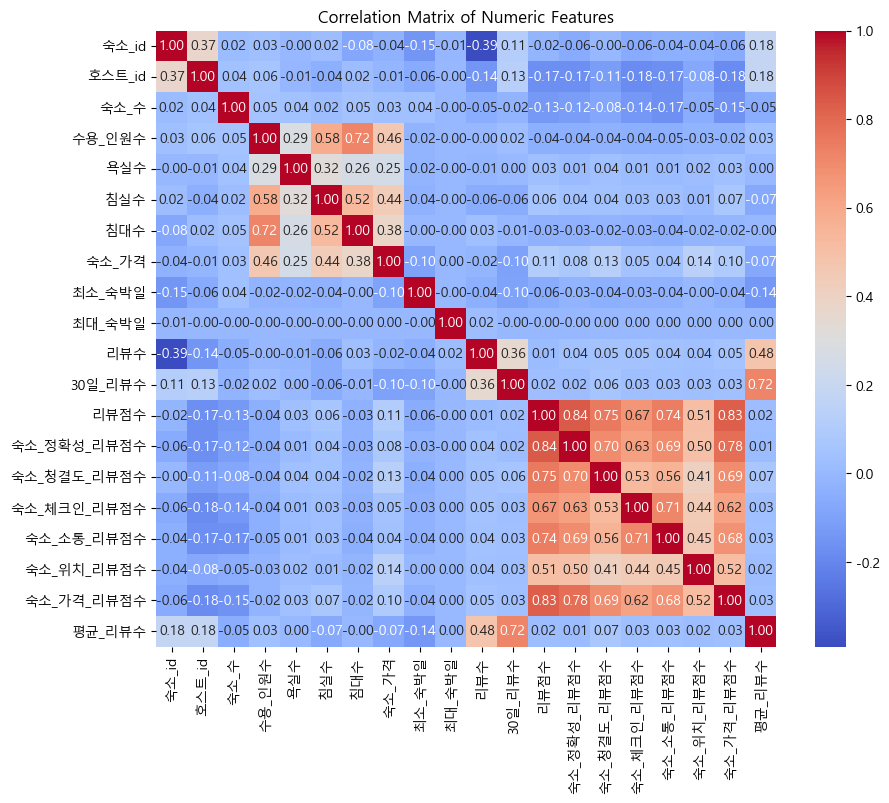

In [55]:
# 수치형 데이터만 포함하는 데이터프레임 생성
numeric_data = check1.select_dtypes(include=[np.number])

# 상관관계 계산
correlation_matrix = numeric_data.corr()

# 상관관계 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()

# 다중 선형 회귀 모델

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 결측치가 있는 행 제거 (선택적)
check1 = check1.dropna(subset=['숙소_가격', '수용_인원수', '침실수', '침대수'])

# 특성과 타겟 변수 설정
X = check1[['수용_인원수', '침실수', '침대수' ]]  # 영향을 줄 것 같은 변수들
y = check1['숙소_가격']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 예측 및 평가
y_pred = model.coef_

# 회귀 계수 출력
print("회귀 계수:", dict(zip(X.columns, model.coef_)))

# 테스트 데이터에 대한 모델 평가
mse = mean_squared_error(y_test, model.predict(X_test))
print("Mean Squared Error:", mse)


회귀 계수: {'수용_인원수': 16.146074239272014, '침실수': 28.64490337716526, '침대수': 3.0273099223627753}
Mean Squared Error: 3597.5960588497223


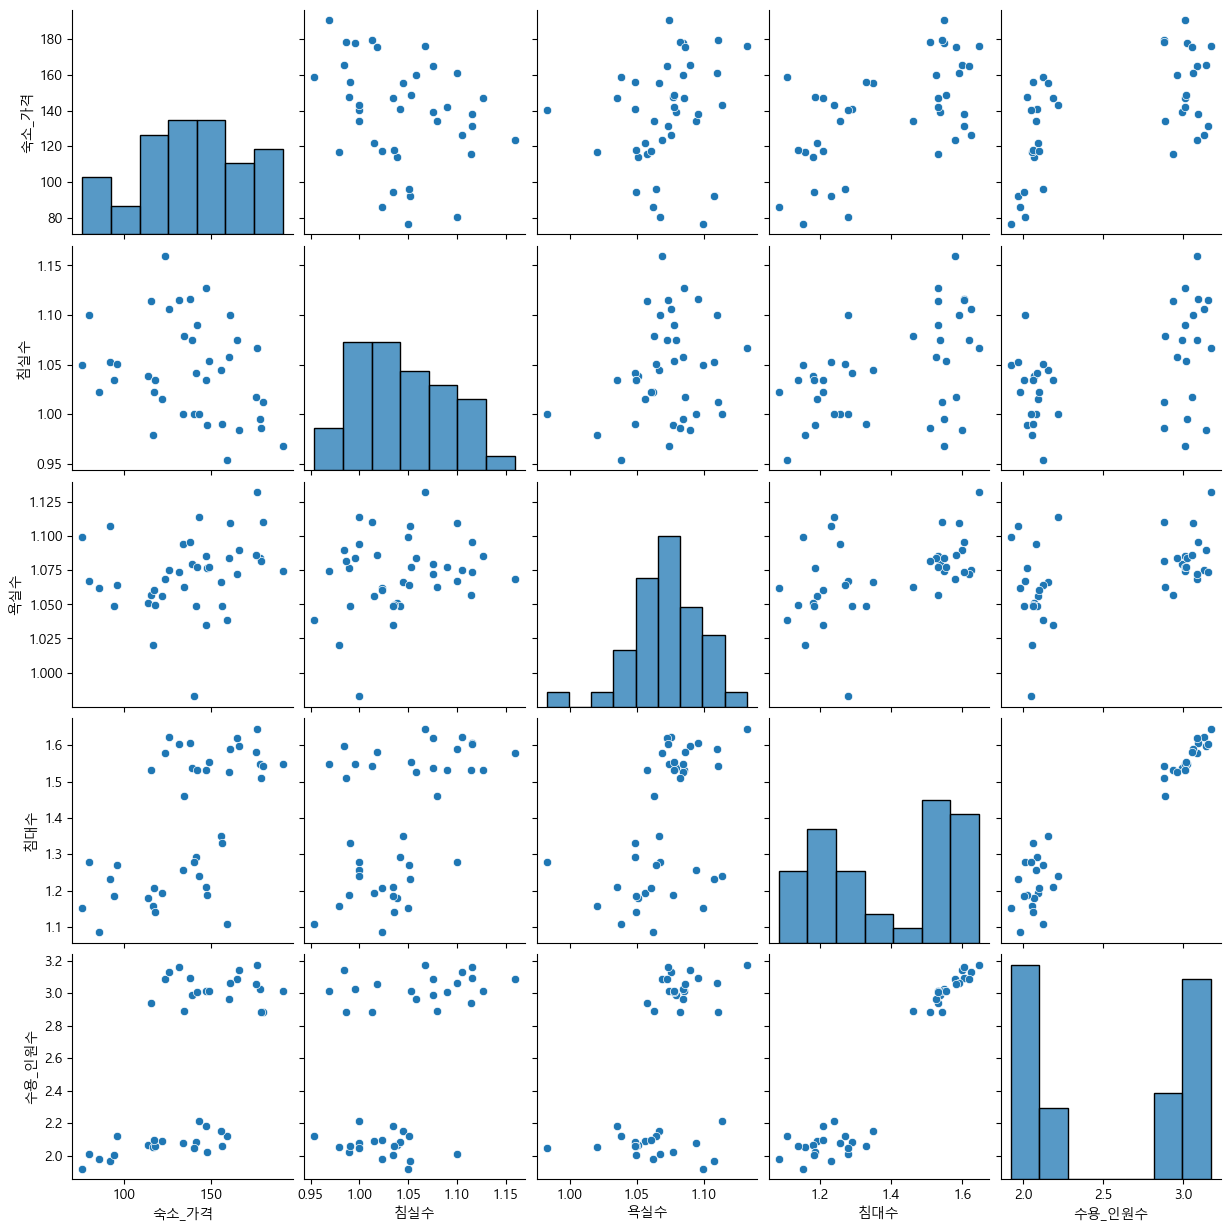

In [58]:
# 숙소_지역 및 숙소_유형별로 그룹화하고 평균 계산
grouped_data = check1.groupby(['숙소_지역', '숙소_유형']).agg({
    '숙소_가격': 'mean',
    '침실수': 'mean',
    '욕실수': 'mean',
    '침대수': 'mean',
    '수용_인원수': 'mean'
}).reset_index()


# Pairplot을 사용하여 변수 간 관계 시각화
sns.pairplot(grouped_data, vars=['숙소_가격', '침실수', '욕실수', '침대수', '수용_인원수'])
plt.show()


In [59]:
check1.isnull().sum()

숙소_id           0
호스트_id          0
슈퍼호스트           0
숙소_수            0
숙소_지역           0
숙소_유형           0
수용_인원수          0
욕실수             0
침실수             0
침대수             0
편의시설            0
숙소_가격           0
최소_숙박일          0
최대_숙박일          0
리뷰수             0
30일_리뷰수         0
리뷰점수            0
숙소_정확성_리뷰점수    19
숙소_청결도_리뷰점수    17
숙소_체크인_리뷰점수    21
숙소_소통_리뷰점수     18
숙소_위치_리뷰점수     20
숙소_가격_리뷰점수     23
평균_리뷰수          0
url             0
숙소_특징           0
dtype: int64

In [64]:
# 필요한 독립변수 선택
features = ['침실수', '욕실수', '침대수', '수용_인원수']

# 결과를 저장할 빈 리스트
results = []

# 유형과 지역별로 모델 훈련 및 평가
for i in check1['숙소_유형'].unique():
    for j in check1['숙소_지역'].unique():
        # 데이터 필터링
        subset = check1[(check1['숙소_유형'] == i) & (check1['숙소_지역'] == j)]
        
        # 충분한 데이터가 있는지 확인
        if len(subset) > 10:  # 최소 데이터 수는 조절 가능
            # 독립변수와 종속변수 설정
            X = subset[features]
            y = subset['숙소_가격']
            
            # 모델 생성 및 훈련
            model = LinearRegression()
            model.fit(X, y)
            
            # 예측 및 성능 평가
            y_pred = model.predict(X)
            mse = mean_squared_error(y, y_pred)
            
            # 결과 저장
            results.append({
                '숙소_유형': i,
                '숙소_지역': j,
                'MSE': mse,
                '계수': model.coef_,
                '절편': model.intercept_
            })

# 결과 DataFrame 생성
results_df = pd.DataFrame(results)
print(results_df)


              숙소_유형                숙소_지역          MSE  \
0   Entire home/apt         Observatoire  2917.015301   
1   Entire home/apt               Temple  3587.687951   
2   Entire home/apt       Hôtel-de-Ville  3899.761871   
3   Entire home/apt             Entrepôt  2810.710896   
4   Entire home/apt    Buttes-Montmartre  2621.316167   
5   Entire home/apt                Opéra  3389.600375   
6   Entire home/apt  Batignolles-Monceau  2969.365522   
7   Entire home/apt                Passy  3649.338724   
8   Entire home/apt               Élysée  3265.240482   
9   Entire home/apt            Vaugirard  3115.425629   
10  Entire home/apt               Bourse  3259.263406   
11  Entire home/apt           Popincourt  2622.271735   
12  Entire home/apt               Louvre  3931.401283   
13  Entire home/apt             Gobelins  2106.520350   
14  Entire home/apt      Buttes-Chaumont  2338.153141   
15  Entire home/apt             Panthéon  3336.059570   
16  Entire home/apt           L

In [69]:
results_df.sort_values(by='MSE')


,숙소_유형,숙소_지역,MSE,계수,절편
34,Private room,Buttes-Chaumont,1443.993865,"[-6.147007155641186, -14.467464611750659, 9.01...",68.648676
38,Private room,Ménilmontant,1469.271150,"[-5.558730466117673, 5.115924384278877, 11.367...",29.267769
31,Private room,Popincourt,1848.778688,"[0.3539171897744985, -30.237815502735643, 2.07...",86.952734
24,Private room,Buttes-Montmartre,1899.654152,"[11.342820765357628, 2.305865368765712, 9.3918...",33.866562
18,Entire home/apt,Ménilmontant,1983.498318,"[23.786586152578554, 17.982183581683415, 1.517...",38.414952
13,Entire home/apt,Gobelins,2106.520350,"[30.707539271948985, 30.665433230537822, 0.679...",25.058946
14,Entire home/apt,Buttes-Chaumont,2338.153141,"[28.465773465707784, 16.14814546430199, -1.632...",47.859088
17,Entire home/apt,Reuilly,2554.909024,"[26.892819186672224, 7.869712964730171, 0.0220...",48.626181
4,Entire home/apt,Buttes-Montmartre,2621.316167,"[32.71047652042839, 21.02983851578049, 1.30697...",46.115642
11,Entire home/apt,Popincourt,2622.271735,"[34.78309654821163, 24.909518273473715, 5.3870...",45.898038


In [ ]:
# 필요한 독립변수 선택
features = ['침실수', '욕실수', '침대수', '수용_인원수']

# 결과를 저장할 빈 리스트
results = []

# 유형과 지역별로 모델 훈련 및 평가
for i in check1['숙소_유형'].unique():
    for j in check1['숙소_지역'].unique():
        # 데이터 필터링
        subset = check1[(check1['숙소_유형'] == i) & (check1['숙소_지역'] == j)]
        
        # 충분한 데이터가 있는지 확인
        if len(subset) > 10:  # 최소 데이터 수는 조절 가능
            # 독립변수와 종속변수 설정
            X = subset[features]
            y = subset['숙소_가격']
            
            # 모델 생성 및 훈련
            model = LinearRegression()
            model.fit(X, y)
            
            # 예측 및 성능 평가
            y_pred = model.predict(X)
            mse = mean_squared_error(y, y_pred)
            
            # 결과 저장
            results.append({
                '숙소_유형': i,
                '숙소_지역': j,
                'MSE': mse,
                '계수': model.coef_,
                '절편': model.intercept_
            })

# 결과 DataFrame 생성
results_df = pd.DataFrame(results)
print(results_df)
